The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t
enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e.
name, age, gender, socio-economic class, etc.)

In [1]:
!wget https://www.dropbox.com/s/rrpaaz4mo3gmxwm/titainic_train.csv -nv

2024-02-12 20:58:17 URL:https://uc15a5f0eb5e3f598823d362c757.dl.dropboxusercontent.com/cd/0/inline/CNIhStnmdG7etBNKLu066R_4StvIBMt1uQ056v3aIngh2i-_xUD-P1ws1GFGbF38dVjrUBTYLq1KWER5eHTWNddDLMUmZzlrd1sYPu8Fx-Hhz-GDMVC4QofBeezAzBzRA_cWh8nClXyVoVg3w3sNsjUJ/file [61194/61194] -> "titainic_train.csv" [1]


In [2]:
!wget https://www.dropbox.com/s/yzaqdn6cs773ga1/titanic_test.csv -nv

2024-02-12 20:58:41 URL:https://uc71868518118378a891a437ad06.dl.dropboxusercontent.com/cd/0/inline/CNL6I7tRL4vMCc4JZ4KAhXN5di_4IM95ebMZmZvRuXNgXrD-dXwOIc8euDNSbi9-u4ZJiz-7UJfxf49WG7CqQ29rarN-e0jmMRRbGfC2G_fU8ECEvVqDHFzzDvsYWQa8ZiChN3xzbUUG9vEELz75Ezyx/file [28629/28629] -> "titanic_test.csv" [1]


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

In [4]:
train_data=pd.read_csv('titainic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data=pd.read_csv('titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


###  missing values in train data

In [10]:
miss_train=pd.DataFrame({'Col_name':train_data.columns,'Missing value?':
                       [any(train_data[x].isnull()) for x in train_data.columns],
                 'Count_':[sum(train_data[y].isnull()) for y in train_data.columns],
                         'Percentage':[sum(train_data[y].isnull())/train_data.shape[0] for y in train_data.columns]})

In [11]:
miss_train.sort_values(by='Count_',ascending=False)

,Col_name,Missing value?,Count_,Percentage
10,Cabin,True,687,0.771044
5,Age,True,177,0.198653
11,Embarked,True,2,0.002245
0,PassengerId,False,0,0.000000
1,Survived,False,0,0.000000
2,Pclass,False,0,0.000000
3,Name,False,0,0.000000
4,Sex,False,0,0.000000
6,SibSp,False,0,0.000000
7,Parch,False,0,0.000000


In [12]:
c=0
for i in range(len(train_data.index)) :
      if any(train_data.iloc[i].isnull()):
             c+=1
                
print('Total missing values: %s'%miss_train.Count_.sum())
print('Number of rows with missing values: %s'%c)
print('Percentage of records with missing value: ',round(float(c)/int(train_data.shape[0]),2))

Total missing values: 866
Number of rows with missing values: 708
Percentage of records with missing value:  0.79


### Missing values in test data

In [13]:
miss_test=pd.DataFrame({'Col_name':test_data.columns,'Missing value?':
                        [any(test_data[x].isnull()) for x in test_data.columns],
               'Count_':[sum(test_data[y].isnull()) for y in test_data.columns],
                       'Percentage':[sum(test_data[y].isnull())/test_data.shape[0] for y in test_data.columns]})
miss_test.sort_values(by='Count_',ascending=False)

,Col_name,Missing value?,Count_,Percentage
9,Cabin,True,327,0.782297
4,Age,True,86,0.205742
8,Fare,True,1,0.002392
0,PassengerId,False,0,0.000000
1,Pclass,False,0,0.000000
2,Name,False,0,0.000000
3,Sex,False,0,0.000000
5,SibSp,False,0,0.000000
6,Parch,False,0,0.000000
7,Ticket,False,0,0.000000


In [14]:
c=0
for i in range(len(test_data.index)) :
      if any(test_data.iloc[i].isnull()):
             c+=1
                
print('Total missing values: %s'%miss_test.Count_.sum())
print('Number of rows with missing values: %s'%c)
print('Percentage of records with missing value: ',round(float(c)/int(test_data.shape[0]),2))

Total missing values: 414
Number of rows with missing values: 331
Percentage of records with missing value:  0.79


As more than 70% data is missing due to column cabin we can drop this column. Then drop the rows with missing data

In [15]:
train_data.drop('Cabin',axis=1,inplace=True)

In [16]:
test_data.drop('Cabin',axis=1,inplace=True)

In [17]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [18]:
train_data.shape,test_data.shape

((712, 11), (331, 10))

## EDA

In [19]:
male_survived=len(train_data[(train_data.Sex=='male') & (train_data.Survived==1)])
female_survived=len(train_data[(train_data.Sex=='female') & (train_data.Survived==1)])

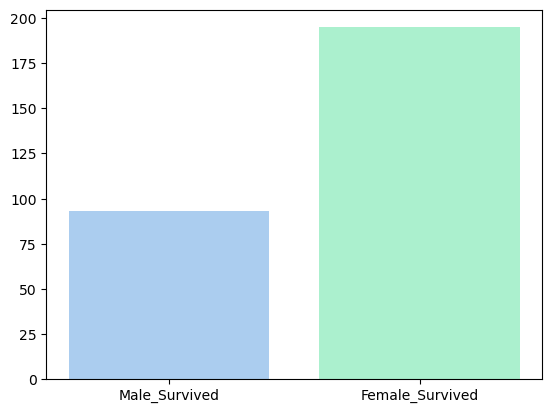

In [20]:
plt.bar(['Male_Survived','Female_Survived'],[male_survived,female_survived],color=['#abcdef','#abf0ce'])
plt.show()

<BarContainer object of 6 artists>

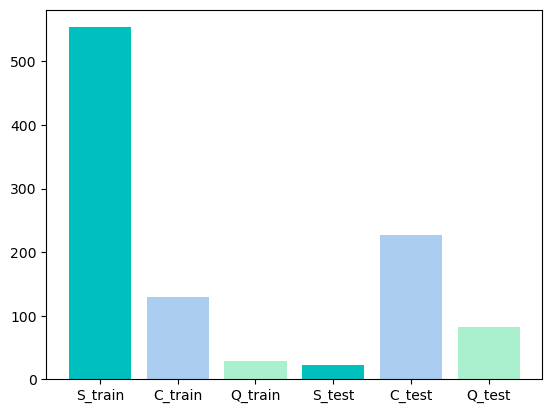

In [21]:
scq=[]
for i in train_data.Embarked.unique():
    scq.append(len(train_data[train_data.Embarked==i]))
    
for i in test_data.Embarked.unique():
    scq.append(len(test_data[test_data.Embarked==i]))
plt.bar(['S_train','C_train','Q_train','S_test','C_test','Q_test'],scq,color=['c','#abcdef','#abf0ce'])

In [22]:
# Age Grouping
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age'] = 4

test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age'] = 4

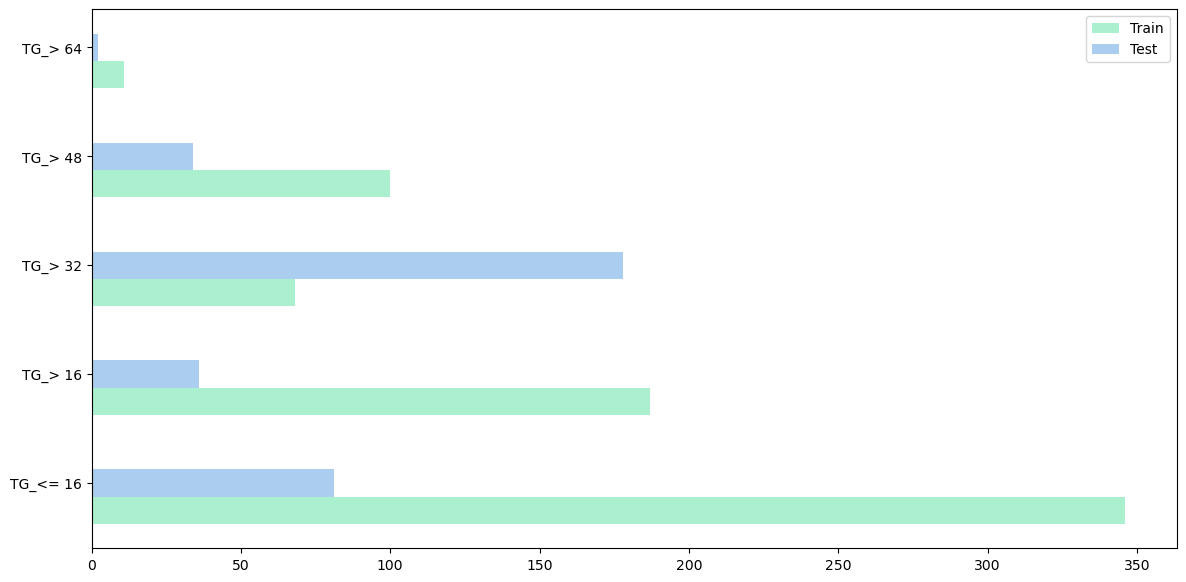

In [23]:
agg_train,agg_test=[],[]
for i in train_data.Age.unique():
    agg_train.append(len(train_data[train_data.Age==i]))
    
    
for i in test_data.Age.unique():
    agg_test.append(len(test_data[test_data.Age==i]))
    
    
age_grps=['TG_<= 16','TG_> 16','TG_> 32','TG_> 48','TG_> 64']
plt.figure(figsize=(14,7))
plt.barh(np.arange(5),agg_train,color='#abf0ce',height=0.25)
plt.barh(np.arange(5)+0.25,agg_test,color='#abcdef',height=0.25)
plt.yticks(np.arange(5) + 0.25,labels=age_grps)
plt.legend(['Train','Test'])
plt.show()

In [24]:
# Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [25]:
train_data['Title'] = train_data['Name'].apply(get_title)
test_data['Title'] = test_data['Name'].apply(get_title)

In [26]:
train_data['Title'].value_counts()

Title
Mr.          398
Miss.        145
Mrs.         107
Master.       36
Rev.           6
Dr.            6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [27]:
test_data.Title.value_counts()

Title
Mr.        182
Miss.       64
Mrs.        62
Master.     17
Col.         2
Rev.         2
Dr.          1
Dona.        1
Name: count, dtype: int64

In [28]:
train_data['Title'] = train_data['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
train_data['Title'] = train_data['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
train_data['Title'] = train_data['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
train_data['Title'] = train_data['Title'].replace(['Mme.'], 'Mrs.')
train_data['Title'].value_counts()

Title
Mr.         398
Miss.       148
Mrs.        108
Master.      36
Officer.     15
Royal.        5
Col.          2
Name: count, dtype: int64

In [29]:
test_data['Title'] = test_data['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
test_data['Title'] = test_data['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
test_data['Title'] = test_data['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
test_data['Title'] = test_data['Title'].replace(['Mme.'], 'Mrs.')
test_data['Title'].value_counts()

Title
Mr.         182
Miss.        64
Mrs.         62
Master.      17
Officer.      3
Col.          2
Royal.        1
Name: count, dtype: int64

In [30]:
#Drop unwanted variables
train_data.drop(['Name', 'Ticket'], axis=1,inplace=True)
test_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [31]:
#Create dummies
train_d = pd.get_dummies(train_data, drop_first=True)
test_d=pd.get_dummies(test_data, drop_first=True)

In [32]:
from sklearn.linear_model import LogisticRegression
X_train=train_d.drop('Survived',axis=1)
y_train=train_d.Survived
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [33]:
y_pred=logmodel.predict(test_d)

## Model Evaluation

In [34]:
!wget https://www.dropbox.com/s/56r45fh8de58yqg/True_Survived.csv -nv

2024-02-12 21:43:17 URL:https://ucf0513f0bbced6720cbaa4a7786.dl.dropboxusercontent.com/cd/0/inline/CNK3lokZ-5t8Gbe4NtqsXDWKnAWC8dilGYsGSWEWgtsZ5gcuU_M32UCnuz2sNEAaKyEgZYXYmmhma2NwOqa67SEiYk9ZEbhuNK5obK1vzW9zpmS8dql7JkNpu7Scrh0Jy_xAObe7nkS3hShy8yRhT9K9/file [671/671] -> "True_Survived.csv" [1]


In [35]:
y_test=pd.read_csv('True_Survived.csv')

In [36]:
print('The accuracy of the model is: ',round(accuracy_score(y_test,y_pred)*100,2))

The accuracy of the model is:  72.81


## Confusion Matrix

<Axes: >

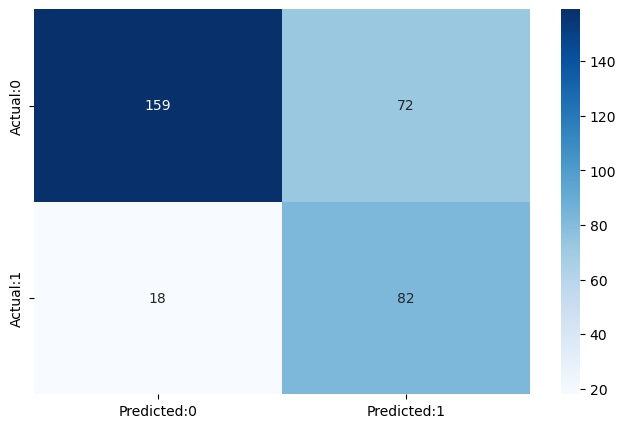

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

In [38]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN)
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity)

True Negative 159
True Positive 82
False Negative 18
False Positive 72
Sensitivity 0.82
Specificity 0.6883116883116883


In [39]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',
'Misclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7280966767371602 

 Misclassification = 1-Accuracy =  0.27190332326283984 

 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.82 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.6883116883116883 

 Positive Predictive value = TP/(TP+FP) =  0.5324675324675324 

 Negative predictive Value = TN/(TN+FN) =  0.8983050847457628 

 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2.6308333333333334 

 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.2615094339622642


The model is more sensitive than specific means it predicts survival more accurately.

## ROC Curve

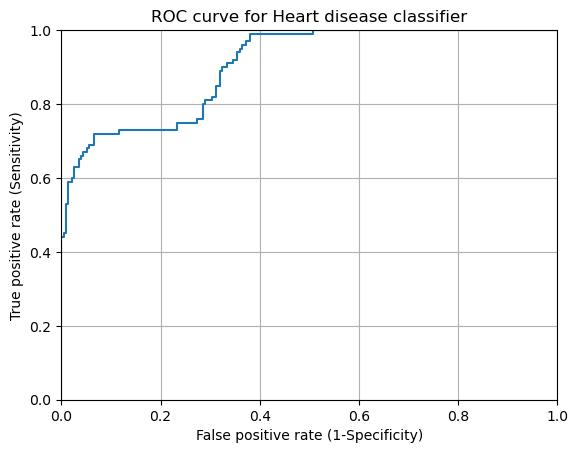

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(test_d)[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

### Area under the curve (AUC)

In [41]:
print('The Area under the curve is: ',round(roc_auc_score(y_test,logmodel.predict_proba(test_d)[:,1])*100,2))

The Area under the curve is:  90.41


### As discussed earlier, if the AUC value is near to 1 it is better as around 90% of data is correctly predicted by the model.

# Conclusion:

The number of females survived is more as compared to males survived.

The model predicted with 73.11 accuracies. The model is more specific than sensitive.

The Area under the ROC curve is 90.42, which is somewhat satisfactory.

The overall model could be improved with more data